In [1]:
import os
import pandas as pd
import numpy as np
import ast

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

from utils import load_pickle, save_pickle
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
# Paths
project_root = os.path.dirname(os.getcwd())

encoded_data_path = os.path.join(project_root, "data", "encoded_symptom_dataset.csv")
label_encoder_path = os.path.join(project_root, "models", "label_encoder.pkl")
model_save_path = os.path.join(project_root, "models", "disease_classifier.pkl")


In [3]:
# Load the dataset
df = pd.read_csv(encoded_data_path)

# Load the saved label encoder
label_encoder = load_pickle(label_encoder_path)

print("Data and Label Encoder loaded successfully!")


Object loaded from c:\Users\ACER\gitClones\DoctorSathiProject\models\label_encoder.pkl
Data and Label Encoder loaded successfully!


In [4]:
# 'symptom_vector' column contains embeddings (but as strings in CSV)
# Convert them back to numpy arrays
X = np.vstack(df['symptom_vector'].apply(ast.literal_eval).values)

# Labels
y = df['label_encoded'].values

print(f"Feature shape: {X.shape}")
print(f"Labels shape: {y.shape}")


Feature shape: (457, 200)
Labels shape: (457,)


In [5]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 365
Testing samples: 92


In [23]:
# Initialize Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


In [24]:
# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
                                 precision    recall  f1-score   support

                           Acne       0.00      0.00      0.00         1
                      Arthritis       0.00      0.00      0.00         1
               Bronchial Asthma       0.67      0.50      0.57         4
           Cervical spondylosis       0.50      0.50      0.50         4
                    Chicken pox       0.33      0.43      0.38         7
                    Common Cold       0.33      0.33      0.33         3
                         Dengue       0.31      0.44      0.36         9
          Dimorphic Hemorrhoids       0.00      0.00      0.00         2
               Fungal infection       0.00      0.00      0.00         2
                   Hypertension       0.00      0.00      0.00         2
                       Impetigo       0.60      0.75      0.67         4
                       Jaundice       0.75      0.60      0.67         5
                        Mal

c:\Users\ACER\gitClones\DoctorSathiProject\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\gitClones\DoctorSathiProject\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\gitClones\DoctorSathiProject\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

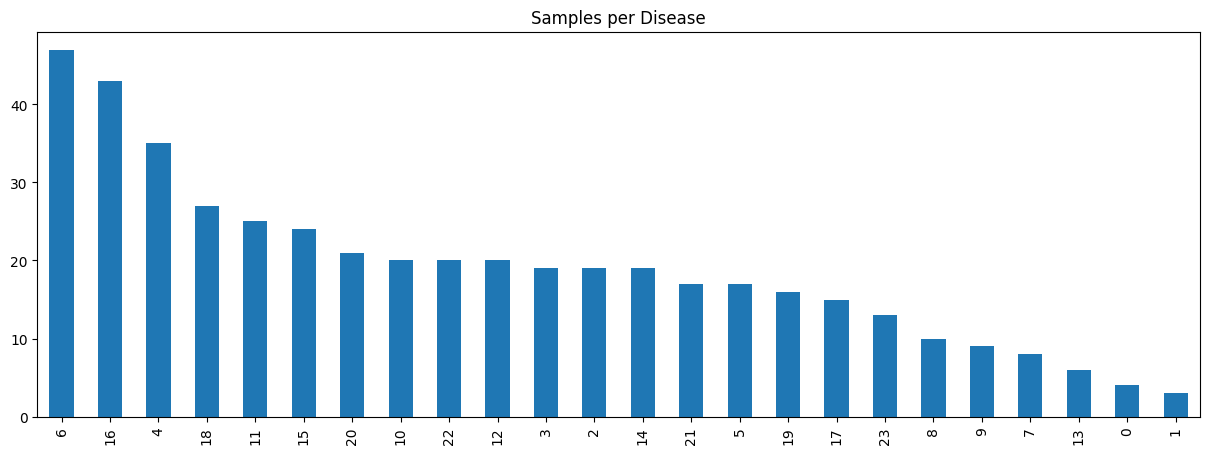

In [25]:
import matplotlib.pyplot as plt

class_counts = pd.Series(y).value_counts()
plt.figure(figsize=(15,5))
class_counts.plot(kind='bar')
plt.title('Samples per Disease')
plt.show()


In [26]:
from sklearn.utils.class_weight import compute_class_weight
clf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)
# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
                                 precision    recall  f1-score   support

                           Acne       0.00      0.00      0.00         1
                      Arthritis       0.25      1.00      0.40         1
               Bronchial Asthma       0.67      0.50      0.57         4
           Cervical spondylosis       0.67      0.50      0.57         4
                    Chicken pox       0.36      0.57      0.44         7
                    Common Cold       0.50      0.33      0.40         3
                         Dengue       0.33      0.33      0.33         9
          Dimorphic Hemorrhoids       0.00      0.00      0.00         2
               Fungal infection       0.00      0.00      0.00         2
                   Hypertension       0.00      0.00      0.00         2
                       Impetigo       0.75      0.75      0.75         4
                       Jaundice       0.75      0.60      0.67         5
                        Mal

c:\Users\ACER\gitClones\DoctorSathiProject\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\gitClones\DoctorSathiProject\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\gitClones\DoctorSathiProject\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [6]:
# BEFORE SMOTE
print("Original dataset shape:", Counter(y))

Original dataset shape: Counter({6: 47, 16: 43, 4: 35, 18: 27, 11: 25, 15: 24, 20: 21, 10: 20, 12: 20, 22: 20, 14: 19, 2: 19, 3: 19, 5: 17, 21: 17, 19: 16, 17: 15, 23: 13, 8: 10, 9: 9, 7: 8, 13: 6, 0: 4, 1: 3})


# Data Augmentation For Imbalance

In [6]:
# Initialize SMOTE
sm = SMOTE(random_state=42, k_neighbors=1)

# Resample
X_resampled, y_resampled = sm.fit_resample(X, y)

# AFTER SMOTE
print("Resampled dataset shape:", Counter(y_resampled))

c:\Users\ACER\gitClones\DoctorSathiProject\env\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ACER\gitClones\DoctorSathiProject\env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ACE

Resampled dataset shape: Counter({15: 47, 17: 47, 16: 47, 4: 47, 10: 47, 6: 47, 8: 47, 5: 47, 14: 47, 7: 47, 1: 47, 0: 47, 2: 47, 9: 47, 13: 47, 3: 47, 11: 47, 12: 47, 23: 47, 18: 47, 21: 47, 20: 47, 22: 47, 19: 47})


# Random Forest Classifier

In [9]:
clf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced')
clf.fit(X_resampled, y_resampled)
# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00         1
                      Arthritis       0.25      1.00      0.40         1
               Bronchial Asthma       1.00      0.50      0.67         4
           Cervical spondylosis       1.00      0.75      0.86         4
                    Chicken pox       0.83      0.71      0.77         7
                    Common Cold       0.50      0.33      0.40         3
                         Dengue       0.73      0.89      0.80         9
          Dimorphic Hemorrhoids       1.00      1.00      1.00         2
               Fungal infection       0.67      1.00      0.80         2
                   Hypertension       1.00      0.50      0.67         2
                       Impetigo       1.00      1.00      1.00         4
                       Jaundice       1.00      0.60      0.75         5
                        Mal

# RandomForestClassifier with Hyper Parameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_resampled, y_resampled)
print(f"Best parameters: {grid_search.best_params_}")
clf = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [27]:
clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
clf.fit(X_resampled, y_resampled)

# Predict on test set
y_pred = clf.predict(X_test)

target_names = [str(label) for label in label_encoder.classes_]
# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.25      1.00      0.40         1
           2       0.75      0.75      0.75         4
           3       1.00      0.75      0.86         4
           4       0.83      0.71      0.77         7
           5       0.50      0.33      0.40         3
           6       0.73      0.89      0.80         9
           7       1.00      1.00      1.00         2
           8       0.67      1.00      0.80         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         4
          11       1.00      0.60      0.75         5
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         1
          14       0.60      0.75      0.67         4
          15       1.00      0.60      0.75         5
          16       0.82      1.00      0.90         9
    

In [10]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=300, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_resampled, y_resampled)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

c:\Users\ACER\gitClones\DoctorSathiProject\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:44:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00         1
                      Arthritis       0.00      0.00      0.00         1
               Bronchial Asthma       1.00      0.50      0.67         4
           Cervical spondylosis       1.00      0.75      0.86         4
                    Chicken pox       0.86      0.86      0.86         7
                    Common Cold       1.00      0.33      0.50         3
                         Dengue       0.82      1.00      0.90         9
          Dimorphic Hemorrhoids       1.00      1.00      1.00         2
               Fungal infection       0.67      1.00      0.80         2
                   Hypertension       1.00      0.50      0.67         2
                       Impetigo       1.00      0.75      0.86         4
                       Jaundice       1.00      0.60      0.75         5
                   

In [15]:
# Fit the label encoder on the full set of original labels
label_encoder.fit(y)  # Use the full original dataset labels (before train-test split)

# Then transform your resampled and test labels
y_resampled_enc = label_encoder.transform(y_resampled)
y_test_enc = label_encoder.transform(y_test)

# One-hot encode
y_resampled_cat = to_categorical(y_resampled_enc)
y_test_cat = to_categorical(y_test_enc)


# Neural Network Architecture

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

In [ ]:
# Convert labels to one-hot encoding
y_resampled_cat = to_categorical(y_resampled)
y_test_cat = to_categorical(label_encoder.transform(y_test))  # Only if y_test is still in string format

model = Sequential()
model.add(Dense(128, input_dim=X_resampled.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_resampled_cat.shape[1], activation='softmax'))

model.summary()

c:\Users\ACER\gitClones\DoctorSathiProject\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │         1,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,544 (138.84 KB)

 Trainable params: 35,544 (138.84 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_resampled, y_resampled_cat, epochs=50, batch_size=32, verbose=1, validation_split=0.1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0591 - loss: 3.1581 - val_accuracy: 0.0088 - val_loss: 3.4403
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2237 - loss: 2.8226 - val_accuracy: 0.0442 - val_loss: 3.4752
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3224 - loss: 2.4926 - val_accuracy: 0.0088 - val_loss: 3.7320
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4100 - loss: 2.1831 - val_accuracy: 0.1062 - val_loss: 3.4359
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4366 - loss: 2.0701 - val_accuracy: 0.1150 - val_loss: 3.4245
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5050 - loss: 1.8038 - val_accuracy: 0.1593 - val_loss: 3.0883
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5305 - loss: 1.6526 - val_accuracy: 0.2124 - val_loss: 2.8198
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5148 - loss: 1.5843 - val_accuracy: 0.3186 - val_loss

In [19]:

# Predict and evaluate
y_pred_nn = model.predict(X_test)
y_pred_labels = y_pred_nn.argmax(axis=1)

target_names = [str(cls) for cls in label_encoder.classes_]

print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_labels, target_names=target_names))
print("Accuracy:", accuracy_score(y_test, y_pred_labels))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.25      1.00      0.40         1
           2       0.75      0.75      0.75         4
           3       1.00      0.75      0.86         4
           4       0.57      0.57      0.57         7
           5       0.67      0.67      0.67         3
           6       1.00      0.22      0.36         9
           7       0.50      1.00      0.67         2
           8       0.33      1.00      0.50         2
           9       1.00      0.50      0.67         2
          10       0.60      0.75      0.67         4
          11       0.67      0.80      0.73         5
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         1
          14       0.80      1.00      0.89         4
          15       0.80      0.80      0.80         5
     

In [22]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred_labels, average='weighted')
recall = recall_score(y_test, y_pred_labels, average='weighted')
f1 = f1_score(y_test, y_pred_labels, average='weighted')

print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted):    {recall:.4f}")
print(f"F1-score (weighted):  {f1:.4f}")

acc = accuracy_score(y_test, y_pred_labels)
print(f"Test Accuracy: {acc:.4f}")

Precision (weighted): 0.7795
Recall (weighted):    0.7065
F1-score (weighted):  0.7003
Test Accuracy: 0.7065


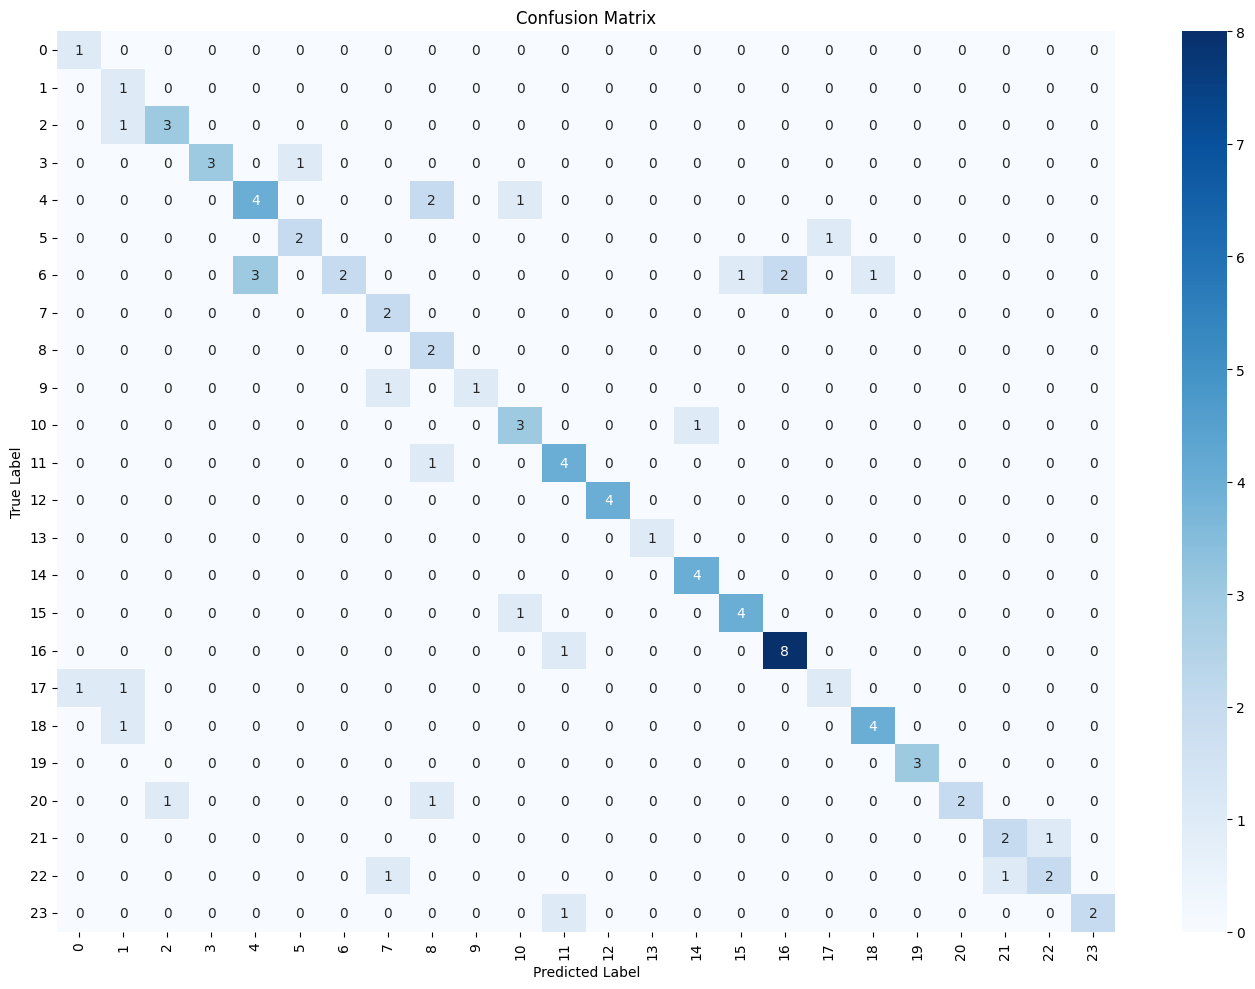

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# XGBoost model with hyperparameter tuning and evaluates its performance, allowing you to compare it with the Random Forest results.

In [7]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Initialize XGBoost Classifier
xgb = XGBClassifier(random_state=42, eval_metric='mlogloss')

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}

# Perform Grid Search
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Best model
best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred_xgb = best_xgb.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
XGBoost Classification Report:
                                 precision    recall  f1-score   support

                           Acne       0.00      0.00      0.00         1
                      Arthritis       0.00      0.00      0.00         1
               Bronchial Asthma       1.00      0.50      0.67         4
           Cervical spondylosis       1.00      0.75      0.86         4
                    Chicken pox       0.83      0.71      0.77         7
                    Common Cold       1.00      0.33      0.50         3
                         Dengue       1.00      0.89      0.94         9
          Dimorphic Hemorrhoids       0.67      1.00      0.80         2
               Fungal infection       0.67      1.00      0.80         2
                   Hypertension       1.00      0.50      0.67         2
                       Impetigo       1.00      1.00      1.00         4
               

c:\Users\ACER\gitClones\DoctorSathiProject\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\gitClones\DoctorSathiProject\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\gitClones\DoctorSathiProject\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita